# Bisection Method: Storm Drain Design

## Problem Statement

A storm drain must carry 5.0 m³/s of water flow. The pipe has:
- Radius: 1.5 m (3.0 m diameter)
- Slope: 0.002 (0.2%)
- Manning's n: 0.013 (concrete)

**Find:** Water depth in the pipe using the bisection method.

**Equations:**
- Area: $A = \frac{r^2}{2}(\theta - \sin\theta)$
- Hydraulic radius: $R = \frac{A}{P}$ where $P = r\theta$
- Velocity: $V = \frac{1}{n}R^{2/3}S^{1/2}$
- Discharge: $Q = AV$
- Depth: $h = r(1 - \cos(\theta/2))$

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Problem parameters
target_Q = 5.0
r = 1.5
S = 0.002
n = 0.013

print(f"Target discharge: {target_Q} m³/s")
print(f"Pipe radius: {r} m")
print(f"Slope: {S}")
print(f"Manning's n: {n}")

Target discharge: 5.0 m³/s
Pipe radius: 1.5 m
Slope: 0.002
Manning's n: 0.013


## Bisection Method Implementation

In [2]:
# Bisection method
a = 0.5  # lower bound
b = 5.0  # upper bound
tolerance = 0.01

print(f"{'Iter':<4} {'θ (rad)':<8} {'Depth (m)':<10} {'Q (m³/s)':<10} {'Error':<10}")
print("-" * 50)

for i in range(20):
    c = (a + b) / 2
    
    # Calculate discharge
    A = (r**2 / 2) * (c - math.sin(c))
    P = r * c
    R = A / P
    V = (1/n) * (R**(2/3)) * (S**(1/2))
    Q = A * V
    
    # Water depth
    h = r * (1 - math.cos(c/2))
    
    # Error
    error = Q - target_Q
    
    print(f"{i+1:<4} {c:<8.3f} {h:<10.3f} {Q:<10.2f} {error:<10.3f}")
    
    if abs(error) < tolerance:
        break
    
    # Update bounds
    if error < 0:
        a = c
    else:
        b = c

final_theta = c
final_depth = h
final_Q = Q

Iter θ (rad)  Depth (m)  Q (m³/s)   Error     
--------------------------------------------------
1    2.750    1.208      6.85       1.849     
2    1.625    0.468      1.06       -3.940    
3    2.188    0.811      3.21       -1.790    
4    2.469    1.005      4.86       -0.144    
5    2.609    1.106      5.81       0.813     
6    2.539    1.055      5.32       0.325     
7    2.504    1.030      5.09       0.088     
8    2.486    1.017      4.97       -0.029    
9    2.495    1.024      5.03       0.029     
10   2.491    1.020      5.00       0.000     


## Results Analysis

In [3]:
diameter = 2 * r
depth_percentage = (final_depth / diameter) * 100

print(f"Solution:")
print(f"Central angle: {final_theta:.4f} rad ({math.degrees(final_theta):.1f}°)")
print(f"Water depth: {final_depth:.3f} m")
print(f"Discharge: {final_Q:.2f} m³/s")
print(f"Capacity utilization: {depth_percentage:.1f}%")

if depth_percentage > 80:
    print("Warning: Pipe over 80% full")
elif depth_percentage > 60:
    print("Caution: Consider larger pipe")
else:
    print("Adequate capacity")

Solution:
Central angle: 2.4907 rad (142.7°)
Water depth: 1.020 m
Discharge: 5.00 m³/s
Capacity utilization: 34.0%
Adequate capacity


## Pipe Size Optimization

Find the minimum pipe diameter that keeps water depth ≤ 60% of the diameter.

In [4]:
# Test different pipe diameters
diameters = np.arange(2.0, 4.0, 0.2)
results = []

for d in diameters:
    r_test = d / 2
    
    # Solve for this diameter
    a, b = 0.5, 5.0
    for j in range(15):
        c = (a + b) / 2
        A = (r_test**2 / 2) * (c - math.sin(c))
        P = r_test * c
        R = A / P
        V = (1/n) * (R**(2/3)) * (S**(1/2))
        Q = A * V
        error = Q - target_Q
        
        if abs(error) < 0.05:
            break
        
        if error < 0:
            a = c
        else:
            b = c
    
    depth = r_test * (1 - math.cos(c/2))
    capacity = (depth / d) * 100
    
    results.append([d, depth, capacity])

# Display results
print(f"{'Diameter (m)':<12} {'Depth (m)':<12} {'Capacity (%)':<12} {'Status'}")
print("-" * 50)

optimal_diameter = None
for d, depth, capacity in results:
    status = "Good" if capacity <= 60 else "Too full"
    if capacity <= 60 and optimal_diameter is None:
        optimal_diameter = d
    
    print(f"{d:<12.1f} {depth:<12.3f} {capacity:<12.1f} {status}")

if optimal_diameter:
    print(f"\nMinimum diameter for ≤60% capacity: {optimal_diameter:.1f} m")

Diameter (m) Depth (m)    Capacity (%) Status
--------------------------------------------------
2.0          1.275        63.8         Too full
2.2          1.194        54.3         Good
2.4          1.134        47.2         Good
2.6          1.092        42.0         Good
2.8          1.056        37.7         Good
3.0          1.017        33.9         Good
3.2          0.993        31.0         Good
3.4          0.973        28.6         Good
3.6          0.953        26.5         Good
3.8          0.933        24.5         Good

Minimum diameter for ≤60% capacity: 2.2 m


## Visualization (CORRECTED - Water at Bottom)

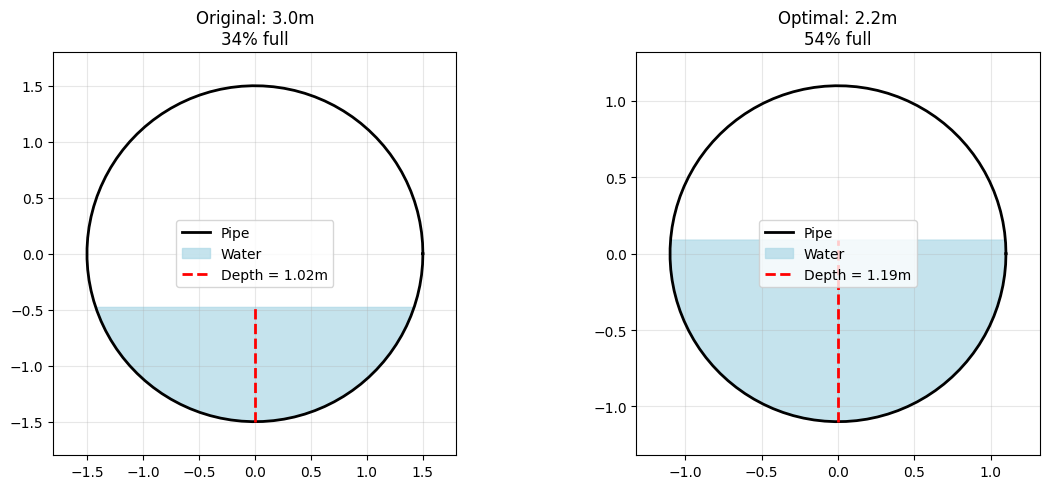

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

def draw_pipe(ax, radius, theta, title):
    # Pipe outline
    angles = np.linspace(0, 2*np.pi, 100)
    x_pipe = radius * np.cos(angles)
    y_pipe = radius * np.sin(angles)
    
    # Water area (FIXED: at bottom due to gravity)
    # Center water at 3π/2 (bottom) instead of π (left side)
    water_angles = np.linspace(3*np.pi/2 - theta/2, 3*np.pi/2 + theta/2, 50)
    x_water = radius * np.cos(water_angles)
    y_water = radius * np.sin(water_angles)
    
    ax.plot(x_pipe, y_pipe, 'k-', linewidth=2, label='Pipe')
    ax.fill(x_water, y_water, color='lightblue', alpha=0.7, label='Water')
    
    # Depth line (from bottom of pipe upward)
    depth = radius * (1 - math.cos(theta/2))
    ax.plot([0, 0], [-radius, -radius + depth], 'r--', linewidth=2, 
            label=f'Depth = {depth:.2f}m')
    
    ax.set_xlim(-radius*1.2, radius*1.2)
    ax.set_ylim(-radius*1.2, radius*1.2)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title)
    ax.legend()

# Original design
draw_pipe(ax1, r, final_theta, f'Original: {diameter}m\n{depth_percentage:.0f}% full')

# Optimal design
if optimal_diameter:
    opt_r = optimal_diameter / 2
    # Recalculate theta for optimal pipe
    a, b = 0.5, 5.0
    for j in range(15):
        c_opt = (a + b) / 2
        A = (opt_r**2 / 2) * (c_opt - math.sin(c_opt))
        P = opt_r * c_opt
        R = A / P
        V = (1/n) * (R**(2/3)) * (S**(1/2))
        Q = A * V
        error = Q - target_Q
        if abs(error) < 0.01: break
        if error < 0: a = c_opt
        else: b = c_opt
    
    opt_depth = opt_r * (1 - math.cos(c_opt/2))
    opt_capacity = (opt_depth / optimal_diameter) * 100
    
    draw_pipe(ax2, opt_r, c_opt, f'Optimal: {optimal_diameter:.1f}m\n{opt_capacity:.0f}% full')

plt.tight_layout()
plt.show()

## Convergence Analysis

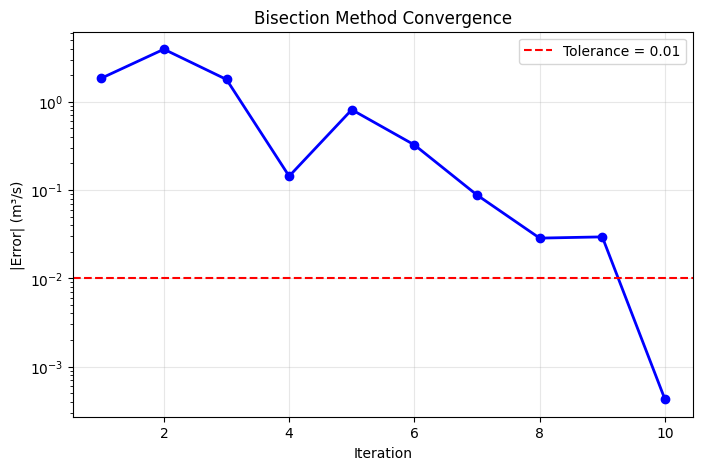

Converged in 10 iterations
Final error: 0.0004 m³/s


In [6]:
# Demonstrate convergence behavior
a = 0.5
b = 5.0
errors = []
iterations = []

for i in range(15):
    c = (a + b) / 2
    
    A = (r**2 / 2) * (c - math.sin(c))
    P = r * c
    R = A / P
    V = (1/n) * (R**(2/3)) * (S**(1/2))
    Q = A * V
    
    error = abs(Q - target_Q)
    errors.append(error)
    iterations.append(i + 1)
    
    if error < 0.01:
        break
    
    if Q < target_Q:
        a = c
    else:
        b = c

plt.figure(figsize=(8, 5))
plt.semilogy(iterations, errors, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=0.01, color='r', linestyle='--', label='Tolerance = 0.01')
plt.xlabel('Iteration')
plt.ylabel('|Error| (m³/s)')
plt.title('Bisection Method Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Converged in {len(iterations)} iterations")
print(f"Final error: {errors[-1]:.4f} m³/s")